# Explorando o conjunto de dados de câncer de mama de Wisconsin

### Paulo Cysne Rios, Jr., Maio de 2018

# 1 - Introdução


O arquivo data.csv que é lido neste notebook é resultado de exames de biopsia de massas mamárias. Ele contém um conjunto de dados real dos EUA que está disponível publicamente neste endereço:

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Os atributos/colunas deste conjunto de dados descrevem os características dos núcleos das células de uma massa mamária e são calculados a partir de uma imagem digitalizada da massa mamária.

Cada massa mamária é classificada como maligna ou benigna neste conjunto de dados. 

As duas primeiras colunas são a identificação e o diagnóstico da massa mamária (benigno ou maligno):

	• ID number -- identificação anônima
	• Diagnosis (M = maligno, B = benigno) 

As colunas 3 - 32 são valores computados para o núcleo das células da massa mamária. O nome de cada coluna está em inglês. Veja que para cada uma das características abaixo foram calculados o pior valor (worst), o valor médio (mean) e o error padrão (standard error, abreviado como se).

	• a) radius (mean of distances from center to points on the perimeter)
	• b) texture (standard deviation of gray-scale values)
	• c) perimeter
	• d) area
	• e) smoothness (local variation in radius lengths)
	• f) compactness (perimeter^2 / area - 1.0)
	• g) concavity (severity of concave portions of the contour)
	• h) concave points (number of concave portions of the contour)
	• i) symmetry
	• j) fractal dimension ("coastline approximation" - 1)

Desta forma, a média, erro padrão e "pior" ou maior (média dos três maiores valores) destas características foram calculados para cada imagem, resultando em 30 atributos. Por exemplo, para a característica raio: a coluna 3 é o valor médio do raio, a coluna 13 é o erro padrão do raio e a coluna 23 é o pior valor do raio.

# 2 - Preparando os dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.shape

(569, 33)

In [4]:
print("\n \t O conjunto de dados tem {0[0]} linhas e {0[1]} colunas. \n".format(data.shape))


 	 O conjunto de dados tem 569 linhas e 33 colunas. 



Como pode ser visto abaixo, exceto pelo diagnóstico (que é M = maligno ou B = benigno) todas as outras colunas/atributos são do tipo `float64` e possuem 0 números não-nulos, quer dizer, nenhum valor nulo.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

Abaixo vemos que durante a leitura do conjunto de dados, uma coluna extra, "id", foi criada. Usaremos o código a seguir para excluir essa coluna.

In [6]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

      ...       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0     ...               17.33           184.60      2019.0            0.1622   
1     ...               23.41           158.80      1956.0            0.1238   
2     ...               25.53           152.50      1709.0            0.1444   
3     ...               26.50            98.87       567.7            0.2098   
4     ...               16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

#### Excluir coluna "id"

In [7]:
data["id"].head()

0      842302
1      842517
2    84300903
3    84348301
4    84358402
Name: id, dtype: int64

In [8]:
data.drop(["id"], axis = 1, inplace = True)

In [9]:
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean     ...       texture_worst  perimeter_worst  area_worst  \
0         0.2419     ...               17.33           184.60      2019.0   
1         0.1812     ...               23.41           158.80      1956.0   
2         0.2069     ...               25.53           152.50      1709.0   
3         0.2597     ...               26.50            98.87       567.7   
4         0.1809     ...               16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  Unnamed: 32  
0          0.4601                  0.11890          NaN  
1          0.2750                  0.08902          NaN  
2          0.3613                  0.08758          NaN  
3          0.6638                  0.17300          NaN  
4          0.2364                  0.07678          NaN  

[5 rows x 32 columns]

Agora vamos contar quantos diagnósticos são malignos (M) e quantos são benignos (B).

In [10]:
data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# 3 - Visualizando os dados

Usaremos somente os atributos que tem as médias

In [11]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

As colunas com as médias estão na posição 1 a 10

In [12]:
features_mean= list(data.columns[1:11])

In [13]:
features_mean

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

Usaremos o Seaborn para criar um mapa de calor das correlações entre os atributos das médias.

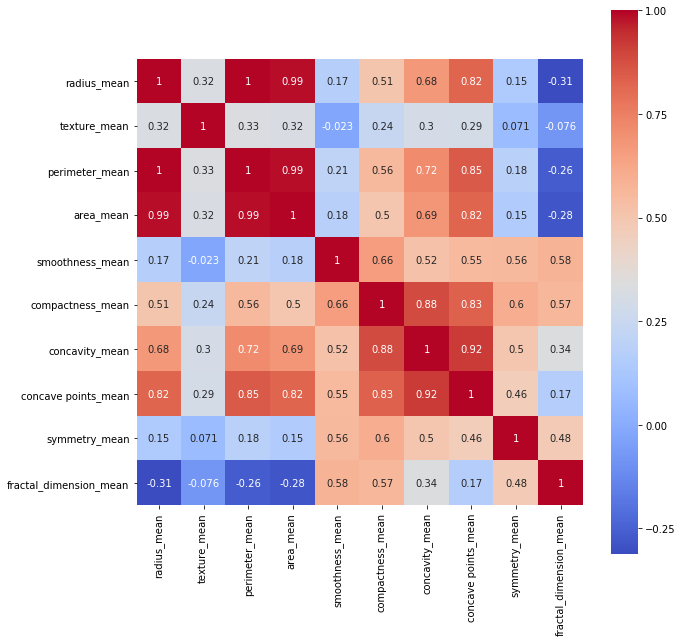

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(data[features_mean].corr(), annot=True, 
            square=True, cmap='coolwarm')
plt.show()

Também é possível criar uma matriz de dispersão com os atributos. Os pontos vermelhos correspondem ao diagnóstico maligno e os azuis ao benigno. Veja como, em alguns casos, os pontos vermelhos e azuis ocupam diferentes regiões dos gráficos.

In [15]:
color_dic = {'M':'red', 'B':'blue'}

In [16]:
colors = data['diagnosis'].map(lambda x: color_dic.get(x))

In [17]:
colors.head()

0    red
1    red
2    red
3    red
4    red
Name: diagnosis, dtype: object

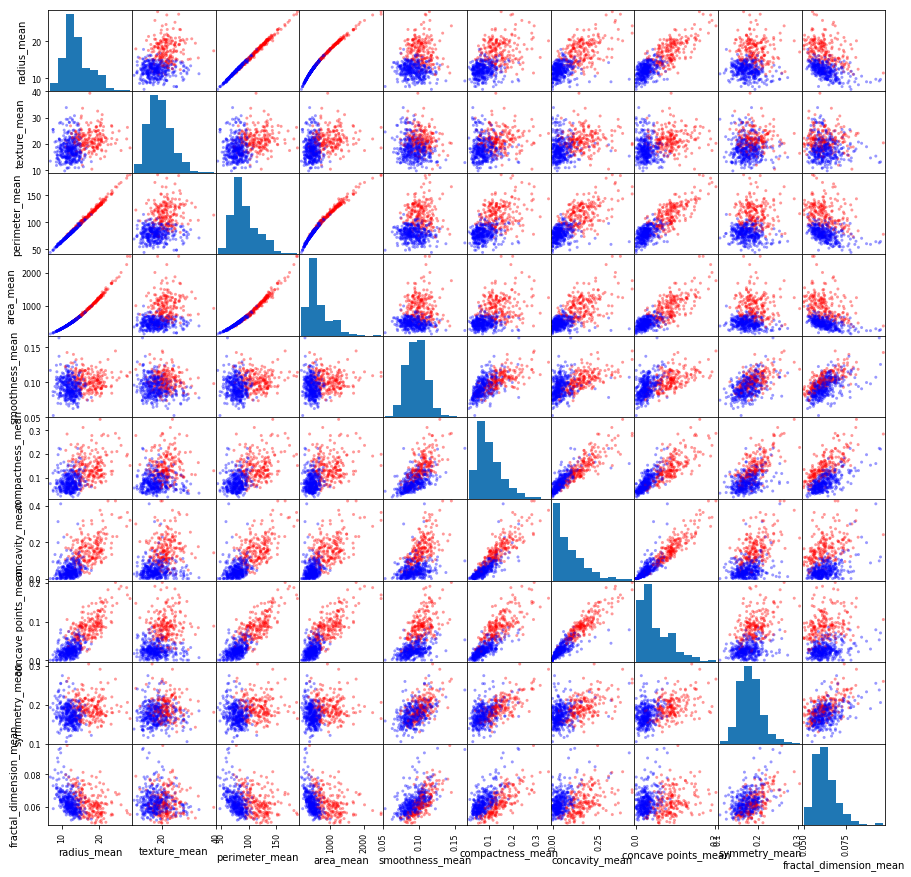

In [18]:
sm = pd.plotting.scatter_matrix(data[features_mean], 
                                c=colors, alpha=0.4, 
                                figsize=((15,15)));

plt.show()

Podemos também se ver como as células malignas ou benignas dos tumores podem ter (ou não) valores diferentes para os diferentes atributos fazendo um gráfico da distribuição de cada tipo de diagnóstico ("M", "B") em relação a cada valor médio dos diferetes características.

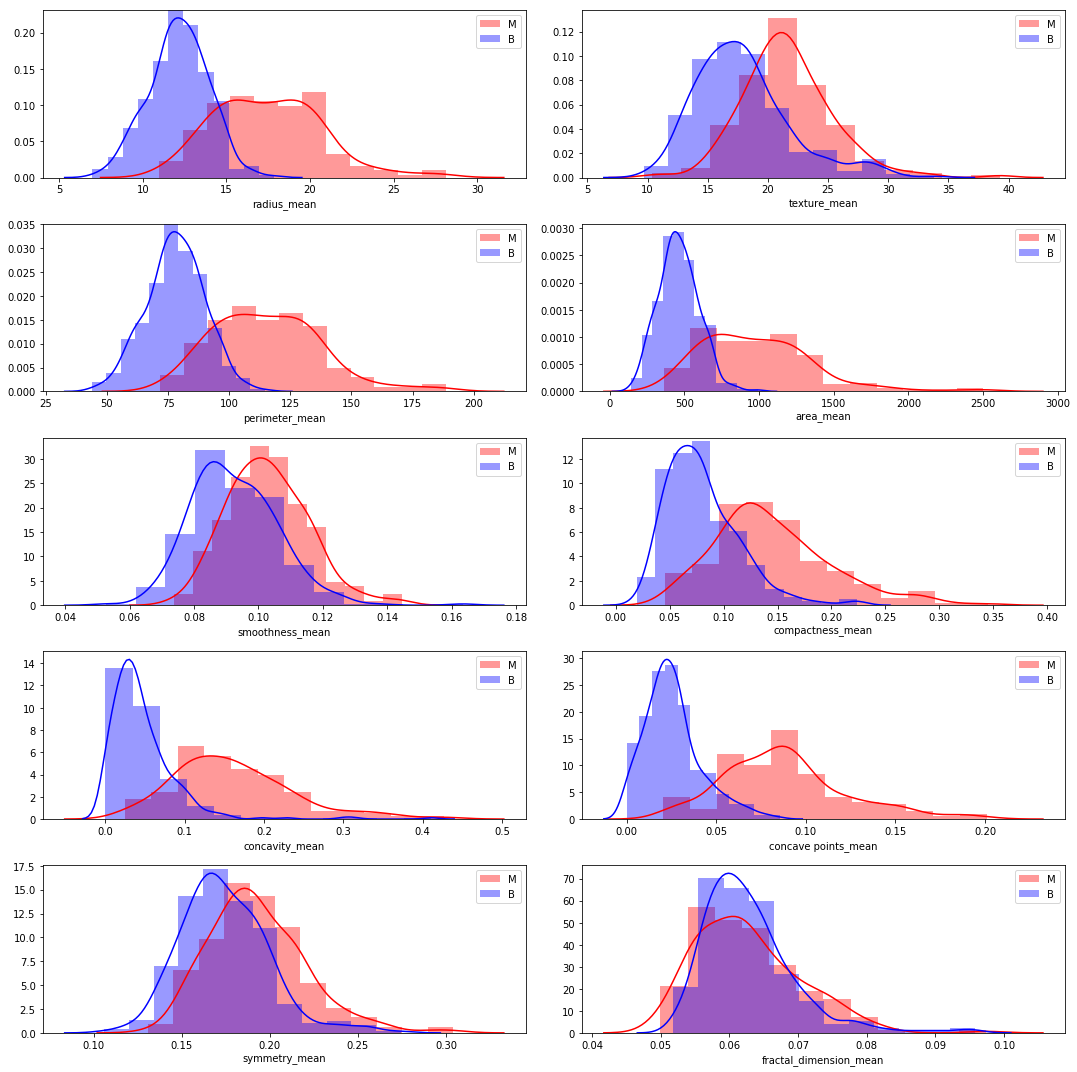

In [19]:
bins = 12
plt.figure(figsize=(15,15))

for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.distplot(data[data['diagnosis']=='M'][feature], 
                 bins=bins, color='red', label='M');
    
    sns.distplot(data[data['diagnosis']=='B'][feature], 
                 bins=bins, color='blue', label='B');
    
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()